In [5]:
import numpy as np
from skmultiflow.data import FileStream
from skmultiflow.neural_networks import PerceptronMask
from fires import FIRES
from sklearn.metrics import accuracy_score

In [46]:
# Load data as scikit-multiflow FileStream
#
stream = FileStream('../datasets/binary/mnist_train_binary.csv', target_idx=0)
stream.prepare_for_use()

In [42]:
x, y = stream.next_sample(batch_size=5)

In [43]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
y

array([0, 0, 0, 0, 0])

In [19]:
# for mnist
y = (y == 3).astype(int)

In [47]:
stream.target_values


[0, 1]

In [48]:
# Initial fit of the predictive model
predictor = PerceptronMask()
x,y = stream.next_sample(batch_size=100)
predictor.partial_fit(x,y, stream.target_values)

PerceptronMask(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
               fit_intercept=True, max_iter=1000, n_iter_no_change=5,
               n_jobs=None, penalty=None, random_state=0, shuffle=True,
               tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
# paint mnist
import matplotlib.pyplot as plt

def paint_digit(digit_values):
    plt.figure()
    plt.imshow(digit_values.reshape(28,28))
    plt.gray()
    plt.xticks([])
    plt.yticks([])
    
    plt.show

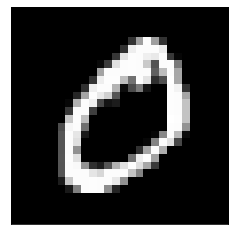

In [62]:
paint_digit(x[0])

In [63]:
fires_model = FIRES(n_total_ftr=stream.n_features,
                    target_values=stream.target_values,
                    mu_init=0,
                    sigma_init=1,
                    model='probit')

In [71]:
n_selected_ftr = 100

x,y = stream.next_sample(batch_size=10)
ftr_weights = fires_model.weigh_features(x,y)
ftr_selection = np.argsort(ftr_weights)[::-1][:n_selected_ftr]
print(ftr_selection)
paint_digits = np.zeros(784)
paint_digits[ftr_selection] = 1 

x_reduced = np.zeros(x.shape)
x_reduced[:, ftr_selection] = x[:, ftr_selection]



[573 601 546 518 545 574 519 490 462 491 600 210 463 237 572 602 238 291
 461 435 265 293 434 407 517 264 211 236 547 379 489 629 321 294 292 266
 406 433 263 209 319 408 239 318 320 381 436 599 380 464 322 492 571 628
 544 460 182 267 378 575 183 346 290 212 603 409 352 347 353 240 298 235
 488 630 350 241 354 326 486 520 516 373 570 270 351 349 598 262 325 459
 543 487 271 295 405 348 268 345 465 493]


In [66]:
paint_digits

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

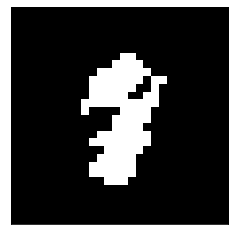

In [72]:
paint_digit(paint_digits)

In [73]:
fires_model.mu


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  